### Here we will find the cross correlation between the noise in neighbournig slices

In [1]:
# Import Libraries

import numpy as np
import h5py
import os

import math
import matplotlib.pyplot as plt
from PIL import Image

import h5py

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rcParams.update({'font.size': 12})

In [2]:
tag="Volume"
slice_id = 1000
LineofDraw1 = 940

pixres1 = 2000
pixres2 = 3000
#XZ = [533:2411,slice_id,461:2492]
#_XZ = [slice_id,:,500:2500]

In [14]:
fnn = '/import/scratch/tmp-ct-3/Ammar/AluCube_Compression/CtutilRealReco_WithoutNoiseWithBH/volume.hdf5'
volumeWithBH_YZ=[h5py.File(fnn,'r')[tag][slice_id,:,500:2500],h5py.File(fnn,'r')[tag][slice_id+10,:,500:2500]  ]  #Data to be denoised

fnn = '/import/scratch/tmp-ct-3/Ammar/AluCube_Compression/CtutilRealReco_WithArtifacts/volume.hdf5'
volumeWithArtifacts_YZ=[h5py.File(fnn,'r')[tag][slice_id,:,500:2500],h5py.File(fnn,'r')[tag][slice_id+10,:,500:2500] ]

fnn = '/import/scratch/tmp-ct-3/Ammar/AluCube_Compression/CtutilRealReco_WithoutArtifacts/volume.hdf5'
volumeWithoutArtifacts_YZ=[h5py.File(fnn,'r')[tag][slice_id,:,500:2500],h5py.File(fnn,'r')[tag][slice_id+10,:,500:2500] ]

In [15]:
np.shape(volumeWithArtifacts_YZ[0])

(2000, 2000)

In [16]:
fnn = '/import/scratch/tmp-ct-3/Ammar/AluCube_Compression/CtutilRealReco_WithoutNoiseWithBH/volume.hdf5'
volumeWithBH_XZ=[h5py.File(fnn,'r')[tag][533:2411,slice_id,461:2492],h5py.File(fnn,'r')[tag][533:2411,slice_id+10,461:2492]]   #Data to be denoised

fnn = '/import/scratch/tmp-ct-3/Ammar/AluCube_Compression/CtutilRealReco_WithArtifacts/volume.hdf5'
volumeWithArtifacts_XZ=[h5py.File(fnn,'r')[tag][533:2411,slice_id,461:2492],h5py.File(fnn,'r')[tag][533:2411,slice_id+10,461:2492]] 

fnn = '/import/scratch/tmp-ct-3/Ammar/AluCube_Compression/CtutilRealReco_WithoutArtifacts/volume.hdf5'
volumeWithoutArtifacts_XZ=[h5py.File(fnn,'r')[tag][533:2411,slice_id,461:2492],h5py.File(fnn,'r')[tag][533:2411,slice_id+10,461:2492]] 

### Seeing how the profile of neighbouring slices look like

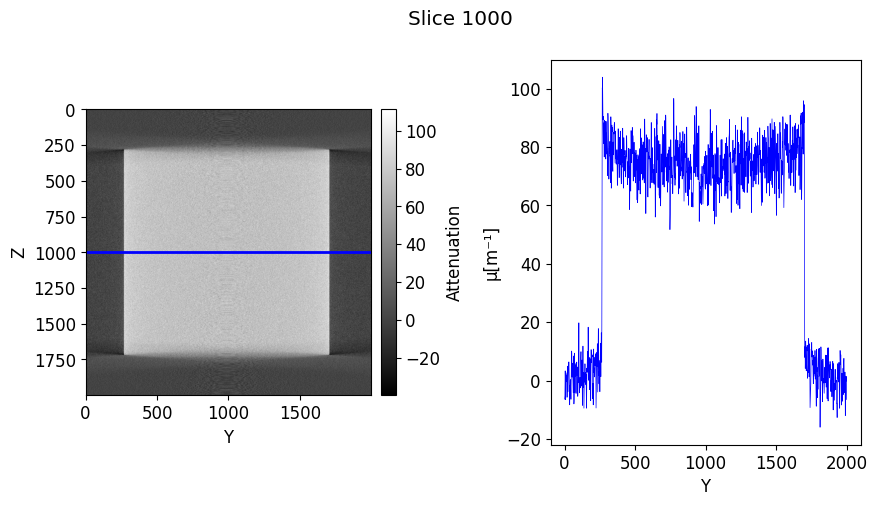

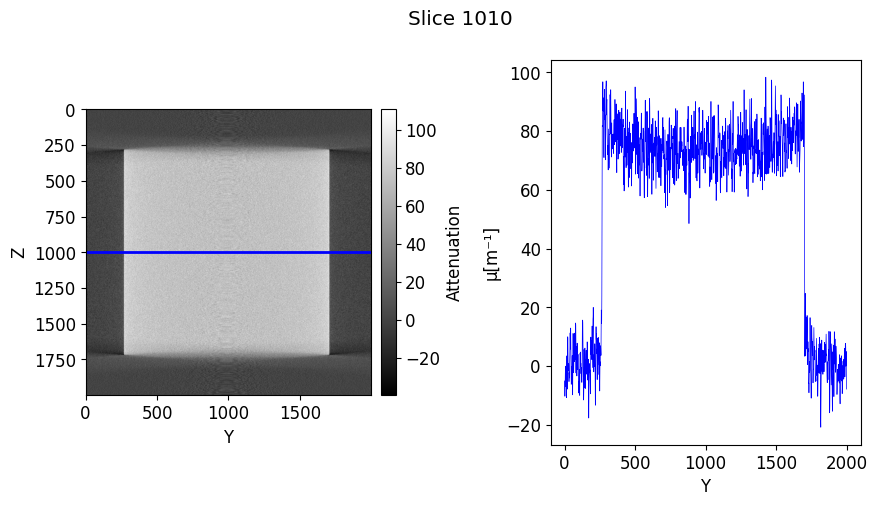

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Slice {}".format(1000))
vmi = volumeWithArtifacts_YZ[0].min()
vma = volumeWithArtifacts_YZ[0].max()

im1 = ax[0].imshow(volumeWithArtifacts_YZ[0],cmap='gray')
ax[0].axhline(y=volumeWithArtifacts_YZ[0].shape[0] // 2, color='blue', lw=2,ls='-')
ax[0].set_xlabel('Y')
ax[0].set_ylabel('Z')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im1, cax=cax)
cbar.set_label('Attenuation')

profileNoisy = volumeWithArtifacts_YZ[0][volumeWithoutArtifacts_YZ[0].shape[0] // 2]
ax[1].plot(profileNoisy,lw=0.5,ls='-',color='blue')
ax[1].set_ylabel('µ[m⁻¹]')
ax[1].set_xlabel('Y')
plt.subplots_adjust(wspace=0.5)
plt.show()

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Slice {}".format(1000+10))
vmi = volumeWithArtifacts_YZ[1].min()
vma = volumeWithArtifacts_YZ[1].max()

im1 = ax[0].imshow(volumeWithArtifacts_YZ[1],cmap='gray')
ax[0].axhline(y=volumeWithArtifacts_YZ[1].shape[0] // 2, color='blue', lw=2,ls='-')
ax[0].set_xlabel('Y')
ax[0].set_ylabel('Z')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im1, cax=cax)
cbar.set_label('Attenuation')

profileNoisy = volumeWithArtifacts_YZ[1][volumeWithoutArtifacts_YZ[1].shape[0] // 2]
ax[1].plot(profileNoisy,lw=0.5,ls='-',color='blue')
ax[1].set_ylabel('µ[m⁻¹]')
ax[1].set_xlabel('Y')
plt.subplots_adjust(wspace=0.5)
plt.show()


### Subtracting the BH profile from the NoisyWithArtifacts profile

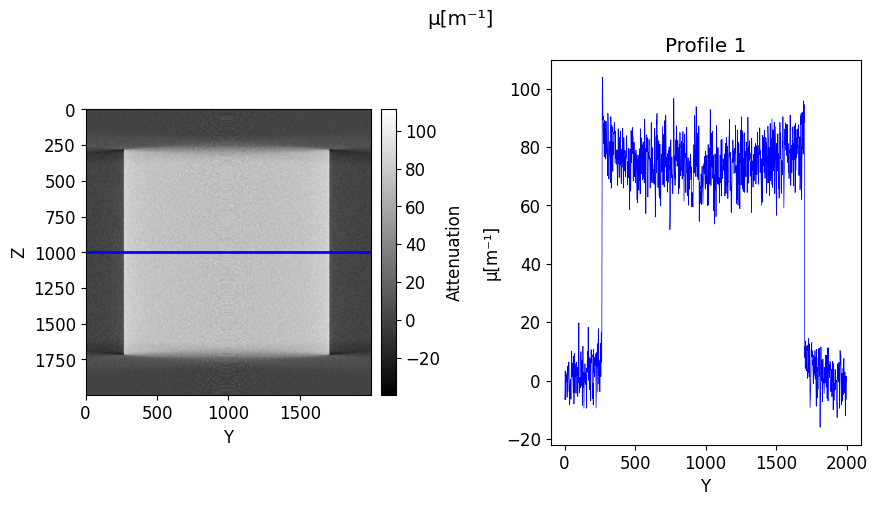

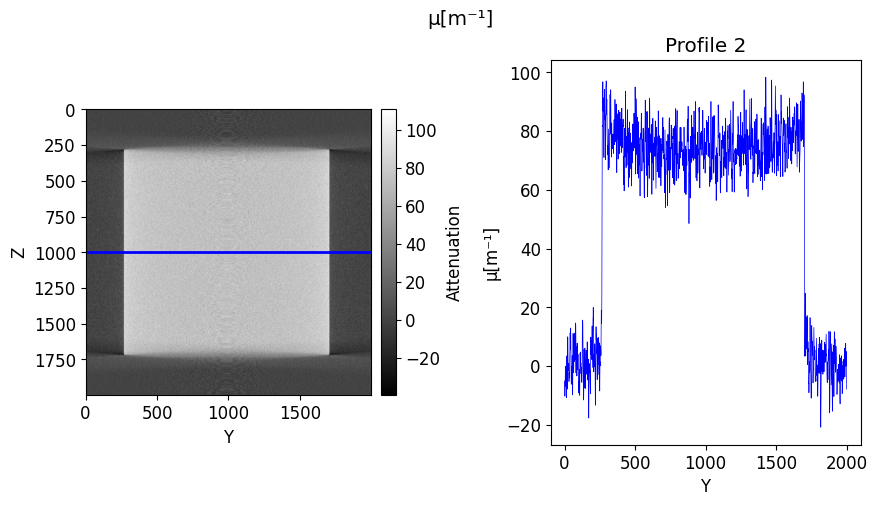

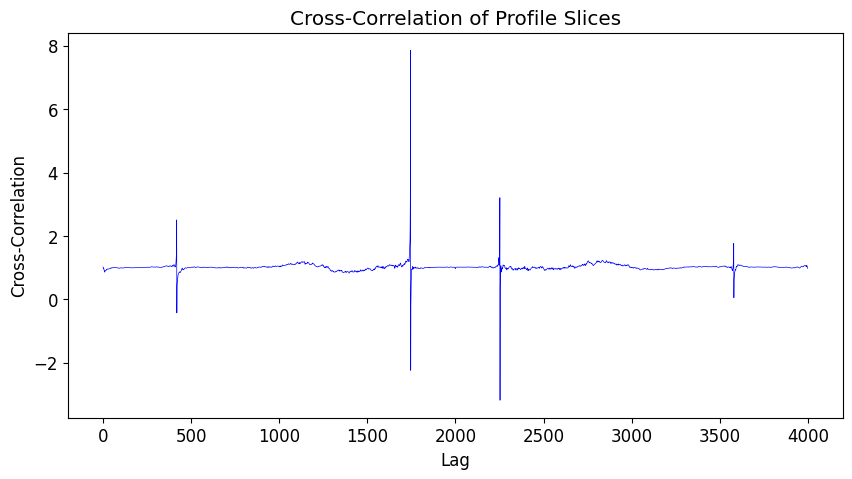

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Function to plot the images and their profiles
def plot_image_with_profile(image, title, ax, color='blue'):
    im = ax[0].imshow(image, cmap='gray')
    ax[0].axhline(y=image.shape[0] // 2, color=color, lw=2, ls='-')
    ax[0].set_xlabel('Y')
    ax[0].set_ylabel('Z')
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('Attenuation')

    profile = image[image.shape[0] // 2]
    ax[1].plot(profile, lw=0.5, ls='-', color=color)
    ax[1].set_ylabel('µ[m⁻¹]')
    ax[1].set_xlabel('Y')
    ax[1].set_title(title)
    plt.subplots_adjust(wspace=0.5)

    return profile

# Example images (replace with actual image data)
# Replace these with your actual image data

# Plot the first image and its profile
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("µ[m⁻¹]")
profile_1 = plot_image_with_profile(volumeWithArtifacts_YZ[0], "Profile 1", ax, color='blue')
plt.show()

# Plot the second image and its profile
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("µ[m⁻¹]")
profile_2 = plot_image_with_profile(volumeWithArtifacts_YZ[1], "Profile 2", ax, color='blue')
plt.show()

# Compute the cross-correlation
auto_correlation = np.correlate(profile_1 - np.mean(profile_1), profile_1 - np.mean(profile_1), mode='full')
cross_correlation = np.correlate(profile_1 - np.mean(profile_1), profile_2 - np.mean(profile_2), mode='full')

# Plot the cross-correlation
plt.figure(figsize=(10, 5))
plt.plot(cross_correlation/auto_correlation, lw=0.5, ls='-', color='blue')
plt.title("Cross-Correlation of Profile Slices")
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.show()


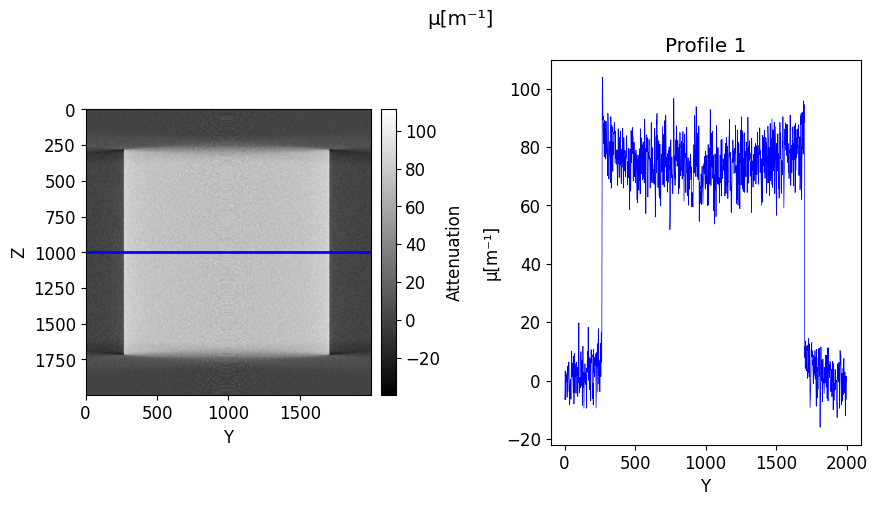

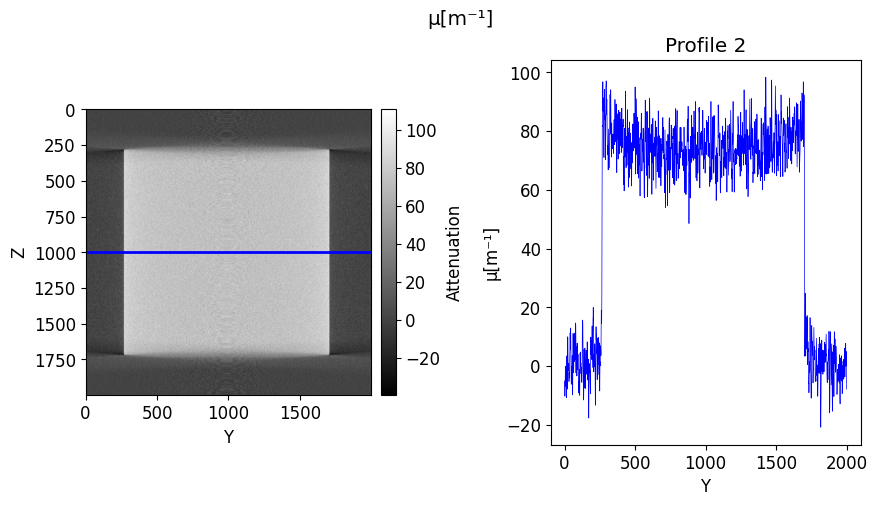

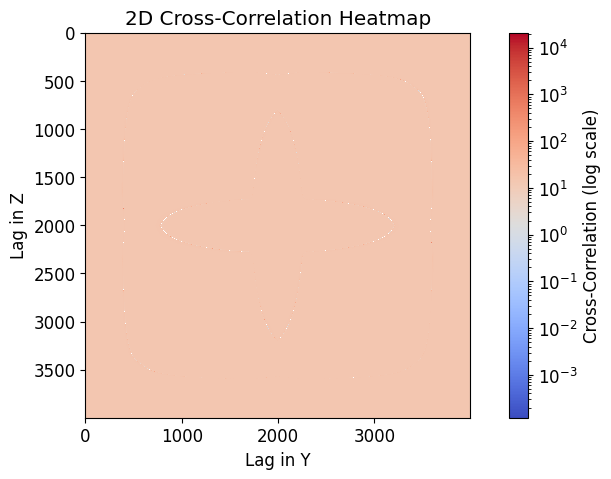

Mean of cross-correlation: 1.0003528594970703
Standard deviation of cross-correlation: 14.853943824768066


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import fftconvolve
from matplotlib.colors import LogNorm

# Function to plot the images and their profiles
def plot_image_with_profile(image, title, ax, color='blue'):
    im = ax[0].imshow(image, cmap='gray')
    ax[0].axhline(y=image.shape[0] // 2, color=color, lw=2, ls='-')
    ax[0].set_xlabel('Y')
    ax[0].set_ylabel('Z')
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('Attenuation')

    profile = image[image.shape[0] // 2]
    ax[1].plot(profile, lw=0.5, ls='-', color=color)
    ax[1].set_ylabel('µ[m⁻¹]')
    ax[1].set_xlabel('Y')
    ax[1].set_title(title)
    plt.subplots_adjust(wspace=0.5)

    return profile

# Example images (replace with actual image data)
# Replace these with your actual image data
#volumeWithArtifacts_YZ = [np.random.random((500, 500)), np.random.random((500, 500))]  # Dummy data for example

# Plot the first image and its profile
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("µ[m⁻¹]")
profile_1 = plot_image_with_profile(volumeWithArtifacts_YZ[0], "Profile 1", ax, color='blue')
plt.show()

# Plot the second image and its profile
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("µ[m⁻¹]")
profile_2 = plot_image_with_profile(volumeWithArtifacts_YZ[1], "Profile 2", ax, color='blue')
plt.show()

# Compute the 2D cross-correlation using fftconvolve
image1 = volumeWithArtifacts_YZ[0] - np.mean(volumeWithArtifacts_YZ[0])
image2 = volumeWithArtifacts_YZ[1] - np.mean(volumeWithArtifacts_YZ[1])

auto_correl_1 = fftconvolve(image1, image1[::-1, ::-1], mode='full')
auto_correl_2 = fftconvolve(image2, image2[::-1, ::-1], mode='full')

cross_correlation_2d = fftconvolve(image1, image2[::-1, ::-1], mode='full')

# Avoid log(0) by adding a small constant
cross_correlation_2d += 1e-10

# Plot the 2D cross-correlation with logarithmic scale
plt.figure(figsize=(10, 5))
plt.imshow(cross_correlation_2d / auto_correl_2, cmap='coolwarm', interpolation='nearest', norm=LogNorm())
plt.colorbar(label='Cross-Correlation (log scale)')
plt.title("2D Cross-Correlation Heatmap")
plt.xlabel("Lag in Y")
plt.ylabel("Lag in Z")
plt.show()

# Calculate mean and standard deviation
mean_correlation = np.mean(cross_correlation_2d / auto_correl_2)
stdev_correlation = np.std(cross_correlation_2d / auto_correl_2)

print(f"Mean of cross-correlation: {mean_correlation}")
print(f"Standard deviation of cross-correlation: {stdev_correlation}")
